In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

## Loading the dataset & Visualizing it

In [2]:
import tensorflow as tf
fashion_mnist = tf.keras.datasets.fashion_mnist
(train_images, train_labels), (test_images, test_labels) = fashion_mnist.load_data()

In [3]:
class_names = [
    "T-shirt/top", "Trouser", "Pullover", "Dress", "Coat",
    "Sandal", "Shirt", "Sneaker", "Bag", "Ankle boot"
]

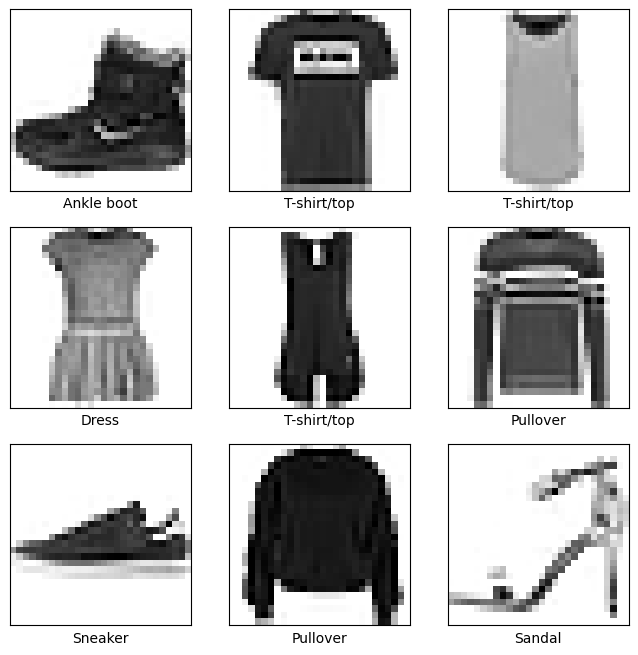

In [4]:
plt.figure(figsize=(8, 8))
for i in range(9):
    plt.subplot(3, 3, i + 1)
    plt.xticks([])
    plt.yticks([])
    plt.grid(False)
    plt.imshow(train_images[i], cmap=plt.cm.binary)
    plt.xlabel(class_names[train_labels[i]])
plt.show()


# Normalizing and training the model

In [5]:
train_images = train_images / 255.0
test_images = test_images / 255.0

In [6]:
X_train = train_images
y_train = train_labels
X_test = test_images
y_test = test_labels

In [7]:
from sklearn.model_selection import train_test_split

X_train, X_validate, y_train, y_validate = train_test_split(X_train, y_train, test_size=0.2, random_state= 12345) 

In [8]:
X_train = X_train.reshape(X_train.shape[0], *(28,28,1))
X_test = X_test.reshape(X_test.shape[0], *(28,28,1))
X_validate = X_validate.reshape(X_validate.shape[0], *(28,28,1))

In [9]:
X_train.shape

(48000, 28, 28, 1)

In [10]:
X_test.shape

(10000, 28, 28, 1)

In [11]:
X_validate.shape

(12000, 28, 28, 1)

In [22]:
import tensorflow as tf
from tensorflow import keras
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Input, Conv2D, MaxPooling2D, Dense, Flatten, Dropout
from tensorflow.keras.optimizers import Adam
from tensorflow.keras.callbacks import TensorBoard


In [23]:
cnn_model = Sequential([
    Input(shape=(28, 28, 1)),  # replace with your actual input shape
    Conv2D(32, (3,3), activation='relu'),
    MaxPooling2D(pool_size=(2,2)),
    Flatten(),
    Dense(32, activation='relu'),
    Dense(10, activation='sigmoid')
])

In [27]:
cnn_model.compile(
    loss='sparse_categorical_crossentropy',
    optimizer=Adam(learning_rate=0.001),
    metrics=['accuracy']
)


In [28]:
#tensorboard = TensorBoard(log_dir='logs')

cnn_model.fit(
    X_train,
    y_train,
    epochs=50,
    batch_size=512,
    validation_data=(X_validate, y_validate),
    # callbacks=[tensorboard]
)

Epoch 1/50


2025-07-22 15:28:07.021527: I tensorflow/core/grappler/optimizers/custom_graph_optimizer_registry.cc:117] Plugin optimizer for device_type GPU is enabled.


94/94 ━━━━━━━━━━━━━━━━━━━━ 5s 26ms/step - accuracy: 0.6248 - loss: 1.1758 - val_accuracy: 0.8458 - val_loss: 0.4546
Epoch 2/50
94/94 ━━━━━━━━━━━━━━━━━━━━ 2s 21ms/step - accuracy: 0.8408 - loss: 0.4497 - val_accuracy: 0.8713 - val_loss: 0.3801
Epoch 3/50
94/94 ━━━━━━━━━━━━━━━━━━━━ 2s 21ms/step - accuracy: 0.8683 - loss: 0.3710 - val_accuracy: 0.8827 - val_loss: 0.3400
Epoch 4/50
94/94 ━━━━━━━━━━━━━━━━━━━━ 2s 20ms/step - accuracy: 0.8815 - loss: 0.3393 - val_accuracy: 0.8862 - val_loss: 0.3249
Epoch 5/50
94/94 ━━━━━━━━━━━━━━━━━━━━ 2s 21ms/step - accuracy: 0.8860 - loss: 0.3229 - val_accuracy: 0.8968 - val_loss: 0.3004
Epoch 6/50
94/94 ━━━━━━━━━━━━━━━━━━━━ 2s 20ms/step - accuracy: 0.8964 - loss: 0.2922 - val_accuracy: 0.9029 - val_loss: 0.2837
Epoch 7/50
94/94 ━━━━━━━━━━━━━━━━━━━━ 2s 20ms/step - accuracy: 0.9003 - loss: 0.2839 - val_accuracy: 0.9016 - val_loss: 0.2799
Epoch 8/50
94/94 ━━━━━━━━━━━━━━━━━━━━ 2s 19ms/step - accuracy: 0.9021 - loss: 0.2728 - val_accuracy: 0.9032 - val_loss: 0.